# Imports

In [1]:
import os
while "notebooks" in os.getcwd():
    os.chdir("../")


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns
import pandas as pd
plt.style.use(['science'])

In [3]:
result_path = Path("results")

In [4]:
plot_directory = Path("plots")

# Plots for paper

## Precision plots

In [5]:
#iterations = [100, 500, 1000, 1500, 2000, 3000, 4000, 5000, 6000]
iterations = [100, 500, 1000, 2000, 4000, 6000, 8000, 10000, 15000, 20000, 25000, 30000, 35000]

def get_mean(std: float, comparison_path: Path, qmc:bool = False):

    means = []
    stds = []
    time_differences = []
    for i in iterations:
        arr = np.load(comparision_path / f'precision_comparision_std_{std}_iterations_{i}.npy')
        if qmc:
            diffs =  np.abs(arr[:, 2] - arr[:, 1])
        else:
            diffs =  np.abs(arr[:, 0] - arr[:, 1])
        mean = np.mean(arr[:, 1])
        means.append(np.mean(diffs)/mean)
        stds.append(np.std(diffs))
    return means

def get_mean_for_set_size(std: float, size: int, comparison_path: Path, qmc: bool = False):

    means = []
    stds = []
    time_differences = []
    for i in iterations:
        try:
            arr = np.load(comparison_path / f'precision_comparision_std_{std}_iterations_{i}.npy')
        except:
            return means
        arr = arr[arr[:, 3] == size]
        if qmc:
            diffs =  np.abs(arr[:, 2] - arr[:, 1])
        else:
            diffs =  np.abs(arr[:, 0] - arr[:, 1])
        mean = np.mean(arr[:, 0])
        means.append(np.mean(diffs)/mean)
        stds.append(np.std(diffs))
    return means

def plot_for_std_separate(std: float, comparision_path: Path, features_number: int):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    for i in range(1, features_number+1, 2):
        means = get_mean_for_set_size(std, i, comparision_path)
        means_qmc = get_mean_for_set_size(std, i, comparision_path, qmc=True)
        '''if i >= 12:
            ax.plot(iterations, means, label = str(i), linestyle='dashed')
            ax.plot(iterations, means_qmc, label = str(i), linestyle='dashed')
            
        else:
            #axs[0].plot(iterations, means, label = str(i))
            #axs[1].plot(iterations, means_qmc, label = str(i))
            ...'''
    
    means = get_mean(std, comparision_path)
    ax.plot(iterations, means, label = "Mean Monte Carlo", linestyle = 'dashed', linewidth=2)
    
    means_qmc = get_mean(std, comparision_path, True)
    ax.plot(iterations, means_qmc, label = "Mean Quasi Monte Carlo", linestyle = 'dashed', linewidth=2)
    ax.set_xlim(-1000, 35000)
    ax.set_xlim(-1000, 35000)
    ax.set_ylim(0, 0.15)#np.max(means))
    ax.set_ylim(0, 0.15)#np.max(means))
    ax.set(xlabel='Iterations', ylabel='PG Difference')
    #fig.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), frameon=True)
    fig.legend(loc='center right', frameon=True)
    title = f'Normalized Mean Absolute Error in PG between methods for std = {std}'
    fig.suptitle(title)
    #ax.set(title = "Monte Carlo") 
    #ax.set(title = "Quasi Monte Carlo") 
    #plt.yscale("log")
    #fig.subplots_adjust(right=0.75)
    comparision_path = str(comparision_path)
    comparision_path = comparision_path[comparision_path.find('/')+1:]
    #comparision_path = comparision_path[:comparision_path.find('/')]
    model_name = comparision_path
    plt.savefig(f"{plot_directory}/precision_{model_name}_{std}.jpg",  dpi=1000)
    plt.show()

In [6]:
def get_equal_number_of_iter_and_prec(std: float, size: int, comparison_path: Path, qmc = False):
    time_differences = []
    means = []
    for i in iterations:
        arr = np.load(comparision_path / f'precision_comparision_std_{std}_iterations_{i}.npy')
        if not qmc:
            diffs =  np.abs(arr[:, 0] - arr[:, 1])
        else:
            diffs = np.abs(arr[:, 2] - arr[:, 1])
        mean = np.mean(arr[:, 1])
        means.append(np.mean(diffs)/mean)
        if qmc:
            t_diff = np.mean(arr[:, 6] - arr[:, 5])
        else:
            t_diff = np.mean(arr[:, 4] - arr[:, 5])
        time_differences.append(np.mean(t_diff))
    #print(time_differences)
    for i in range(0, len(iterations)):
        if time_differences[i] > 0:
            iter = iterations[i] 
            break
    #if qmc: 
    #    print(f"Number of equal iterations for QMC: {iter} with precision of {means[i]}")
    #else:
    #    print(f"Number of equal iterations for MC: {iter} with precision of {means[i]}")
    
    return iter, means[i]


## Wine models

### Wine model single

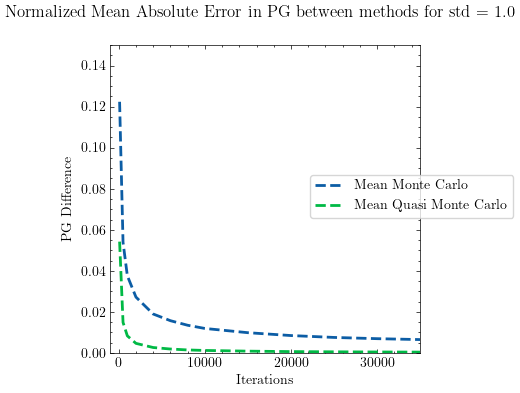

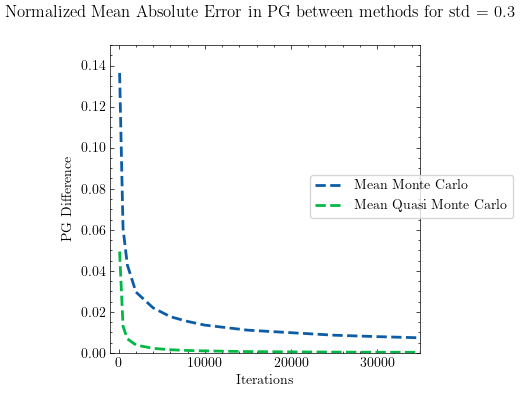

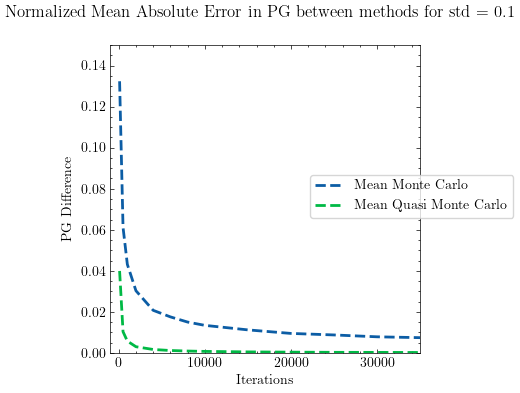

In [7]:
comparision_path = Path("results/wine_model_single/")
for s in [1.0, 0.3, 0.1]:#, 0.03, 0.1, 0.3, 1.0]:
    plot_for_std_separate(s, comparision_path, 11)
    get_equal_number_of_iter_and_prec(s, comparision_path, 11, True)
    get_equal_number_of_iter_and_prec(s, comparision_path, 11, False)

### Wine model

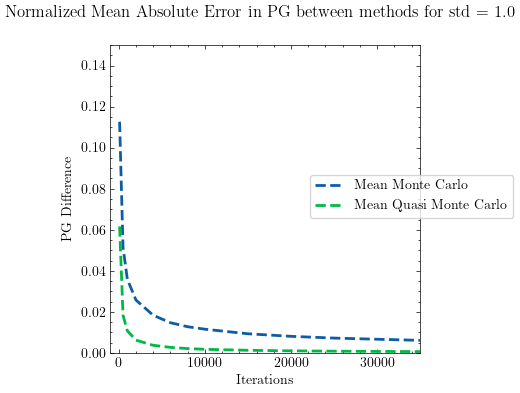

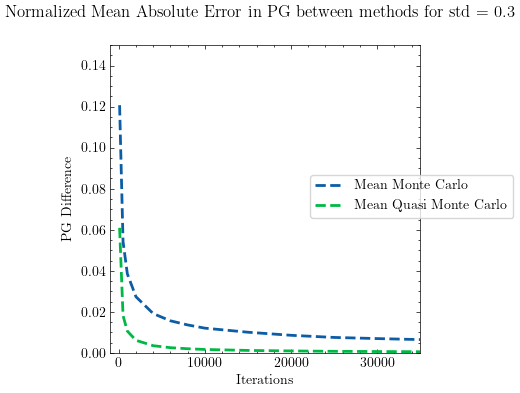

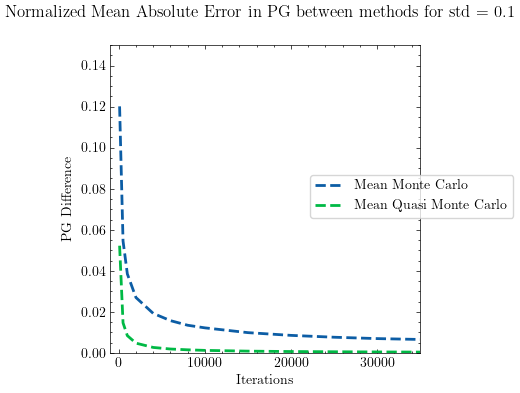

In [8]:
comparision_path = Path("results/wine_model/")
for s in [1.0, 0.3, 0.1]:#, 0.03, 0.1, 0.3, 1.0]:
    plot_for_std_separate(s, comparision_path, 11)
    get_equal_number_of_iter_and_prec(s, comparision_path, 11, True)
    get_equal_number_of_iter_and_prec(s, comparision_path, 11, False)

## Housing models

### Housing model single

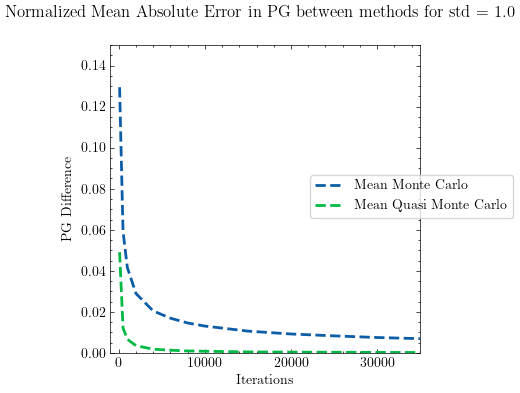

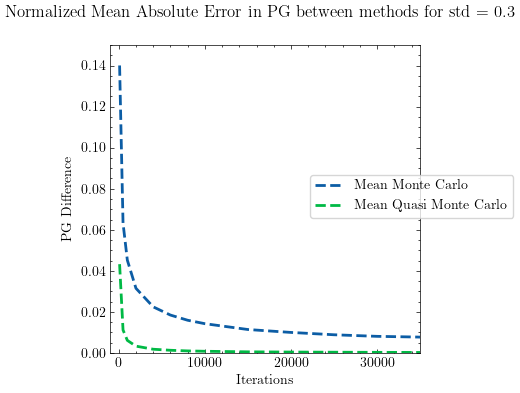

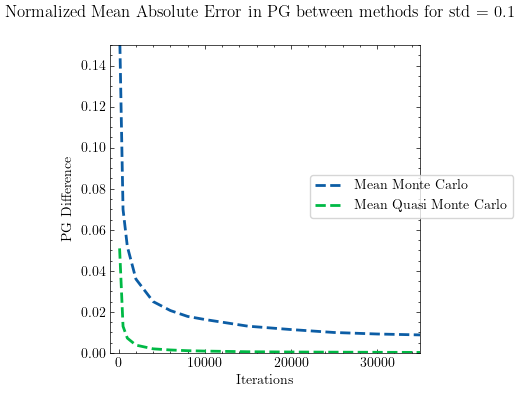

In [9]:
comparision_path = Path("results/housing_model_single/")
for s in [1.0, 0.3, 0.1] :
    plot_for_std_separate(s, comparision_path, 8)
    get_equal_number_of_iter_and_prec(s, comparision_path, 8, True)
    get_equal_number_of_iter_and_prec(s, comparision_path, 8, False)

### Housing model

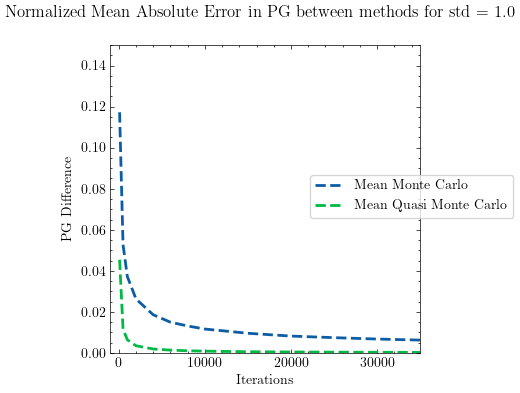

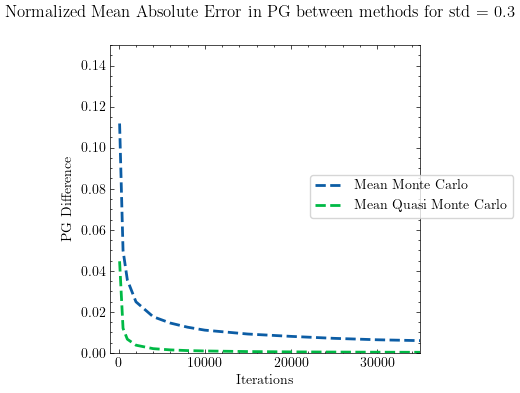

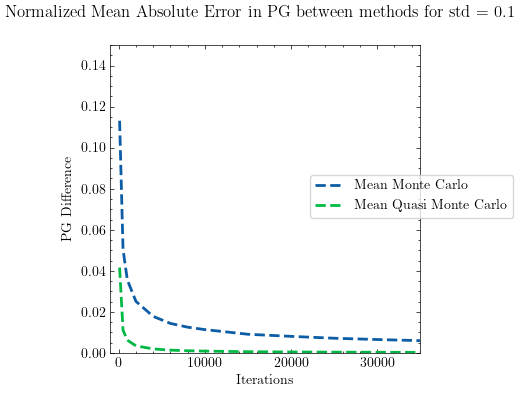

In [10]:
comparision_path = Path("results/housing_model/")
for s in [1.0, 0.3, 0.1] :
    plot_for_std_separate(s, comparision_path, 8)
    get_equal_number_of_iter_and_prec(s, comparision_path, 8, True)
    get_equal_number_of_iter_and_prec(s, comparision_path, 8, False)

## Telemetry model

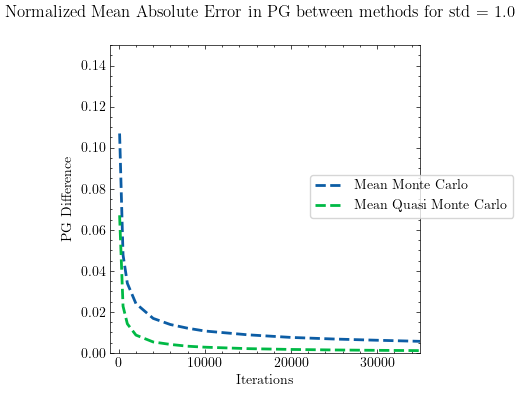

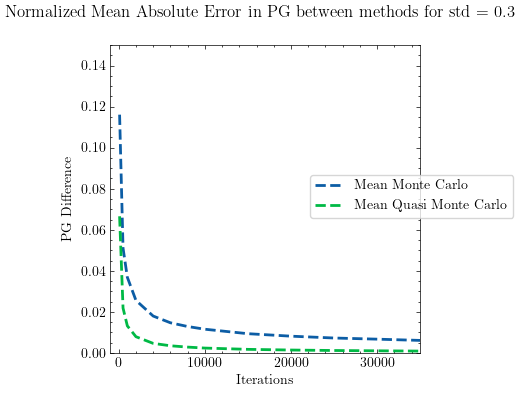

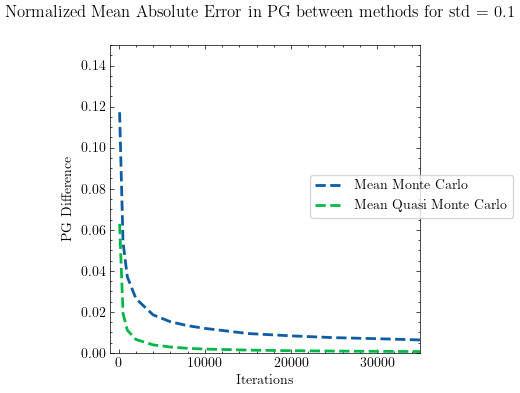

In [11]:
comparision_path = Path("results/telemetry_model/")
for s in [1.0, 0.3, 0.1] :
    plot_for_std_separate(s, comparision_path, 17)
    get_equal_number_of_iter_and_prec(s, comparision_path, 17, True)
    get_equal_number_of_iter_and_prec(s, comparision_path, 17, False)

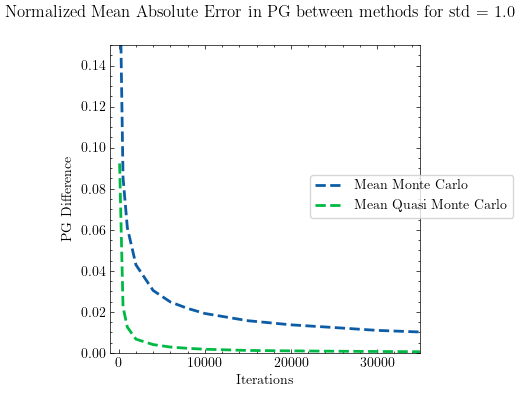

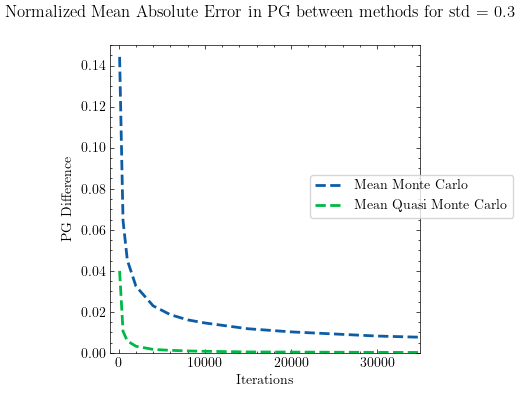

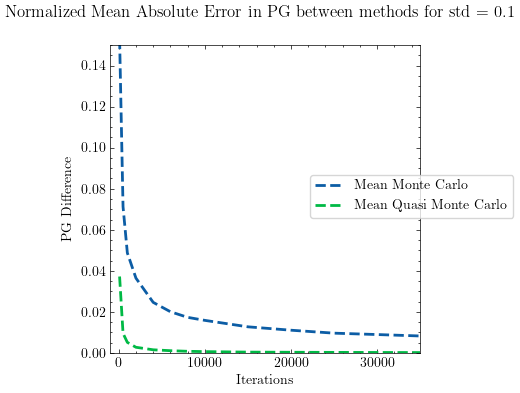

In [12]:
comparision_path = Path("results/telemetry_model_single/")
for s in [1.0, 0.3, 0.1] :
    plot_for_std_separate(s, comparision_path, 17)
    get_equal_number_of_iter_and_prec(s, comparision_path, 17, True)
    get_equal_number_of_iter_and_prec(s, comparision_path, 17, False)

## Get relative error for model, std, iterations

## Ranking errors

### Utils

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
def plot_ranking_validation(result_path: Path, stds, feature_numbers, noising=False, y_max = 1.2):
    fig, axs = plt.subplots(1, 3, figsize=(12, 8))
    df = pd.DataFrame(columns=["method", "value", "stddev"])
    for n in feature_numbers:
        for s in stds:
            if noising:
                arr = np.load(result_path / f"ranking_comparision/ranking_comparision_noising_std_{s}_tested_features_{n}.npy")
            else:
                arr = np.load(result_path / f"ranking_comparision/ranking_comparision_retraining_std_{s}_tested_features_{n}.npy")

            for i in range(0, arr.shape[1]):
                point = arr[:, i]
                pg_err = ((point[0] - point[3]))**2
                shap_err = ((point[1] - point[3]))**2
                df = pd.concat([df, pd.DataFrame([{"method": f"PG", "value": pg_err, "stddev":
                                        s}])],
                    ignore_index=True) 

                df = pd.concat([df, pd.DataFrame([{"method": f"SHAP", "value": shap_err, "stddev":
                                        s}])],
                    ignore_index=True) 
        #print(df)
        g = sns.barplot(df, y="value", x="stddev", hue="method", ax = axs[n-1]).set(title = f"Deleted features = {n}")
        axs[n-1].legend(frameon = False, loc = "upper right")
        axs[n-1].set_ylim(0, y_max)
        #ax.legend(title='Cat', bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
        #g.ax_joint.legend(bbox_to_anchor=(1.5, 1.1))
        #sns.move_legend(ax, "center right")

    comparision_path = str(result_path)
    comparision_path = comparision_path[comparision_path.find('/')+1:]
    #comparision_path = comparision_path[:comparision_path.find('/')]
    model_name = comparision_path
    plt.savefig(f"{plot_directory}/noising_{model_name}.jpg",  dpi=1000)
    plt.show()




### Wine model

#### Noising model

In [81]:
def plot_ranking_validation(result_path: Path, stds, feature_numbers, noising=False, y_max = 1.2):
    #fig, axs = plt.subplots(1, 3, figsize=(12, 8))
    results = []
    for n in feature_numbers:
        df = pd.DataFrame(columns=["method", "MSE", "stddev"])
        for s in stds:
            if noising:
                arr = np.load(result_path / f"ranking_comparision/ranking_comparision_noising_std_{s}_tested_features_{n}.npy")
            else:
                arr = np.load(result_path / f"ranking_comparision/ranking_comparision_retraining_std_{s}_tested_features_{n}.npy")

            for i in range(0, arr.shape[1]):
                point = arr[:, i]
                pg_err = ((point[0] - point[3]))**2
                shap_err = ((point[1] - point[3]))**2
                df = pd.concat([df, pd.DataFrame([{"method": f"PG", "MSE": pg_err, "stddev":
                                        s, "Ranking_method": f"PG std {s}"}])],
                    ignore_index=True) 

                df = pd.concat([df, pd.DataFrame([{"method": f"SHAP", "MSE": shap_err, "stddev":
                                        s, "Ranking_method": "SHAP"}])],
                    ignore_index=True) 
        #print(df)
        #g = sns.barplot(df, y="MSE", x="Ranking_method", hue="method", errorbar= 'sd', ax = axs[n-1], order=df.sort_values('Ranking_method').Ranking_method).set(title = f"Deleted features = {n}")
        #axs[n-1].legend(frameon = False, loc = "upper right")
        #axs[n-1].set_ylim(0, y_max)
        #ax.legend(title='Cat', bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)
        #g.ax_joint.legend(bbox_to_anchor=(1.5, 1.1))
        #sns.move_legend(ax, "center right")
        methods_names = ["SHAP", "PG std 0.1", "PG std 0.3","PG std 1.0",]
        results_dict = {}
        for name in methods_names:
            new_df =  df[df.Ranking_method == name]
            results_dict[name] = new_df.MSE.mean()**0.5
        results.append(results_dict)



    comparision_path = str(result_path)
    comparision_path = comparision_path[comparision_path.find('/')+1:]
    #comparision_path = comparision_path[:comparision_path.find('/')]
    model_name = comparision_path
    #plt.savefig(f"{plot_directory}/noising_{model_name}.jpg",  dpi=1000)
    #plt.show()
    #print(df)
    perturbed = 1
    for i in results:
        #print(i)
        shap =  i["SHAP"]
        pg_01 = i["PG std 0.1"]
        pg_03 = i["PG std 0.3"]
        pg_10 = i["PG std 1.0"]
        print(f"{round(perturbed, 3)} & {round(shap, 3)} & {round(pg_01, 3)} & {round(pg_03, 3)} & {round(pg_10, 3)} \\\\")
        perturbed+=1
        


In [82]:
#for s in [0.1, 0.3, 1.0]:
plot_ranking_validation(Path("results/wine_model/"), [0.1, 0.3, 1.0], [1, 2, 3], True, 1.1)

/tmp/ipykernel_16042/3428702674.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "MSE": pg_err, "stddev":
/tmp/ipykernel_16042/3428702674.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "MSE": pg_err, "stddev":
/tmp/ipykernel_16042/3428702674.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no long

1 & 0.94371008427916 & 0.922084967795374 & 0.922593660599204 & 0.9186824920178731 \\
2 & 0.8928054307616741 & 0.9023016522726607 & 0.8811055278518483 & 0.890722275362337 \\
3 & 0.857722566662239 & 0.8895948374883418 & 0.8701214977832067 & 0.8678977973602692 \\


In [71]:
plot_ranking_validation(Path("results/wine_model/"), [0.1, 0.3, 1.0], [1, 2, 3], False, 0.6)

/tmp/ipykernel_16042/1140553847.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "MSE": pg_err, "stddev":
/tmp/ipykernel_16042/1140553847.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "MSE": pg_err, "stddev":
/tmp/ipykernel_16042/1140553847.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no long

{'SHAP': 0.6698093197649738, 'PG std 0.1': 0.6212650430760596, 'PG std 0.3': 0.6365563255564065, 'PG std 1.0': 0.6666674906121621}
{'SHAP': 0.7198581505820285, 'PG std 0.1': 0.6380944919025493, 'PG std 0.3': 0.6604769710257766, 'PG std 1.0': 0.6724654991886845}
{'SHAP': 0.7218540163097282, 'PG std 0.1': 0.6518804806510172, 'PG std 0.3': 0.6653150241487058, 'PG std 1.0': 0.7112627533799117}


### Housing model

In [72]:

plot_ranking_validation(Path("results/housing_model/"), [0.1, 0.3, 1.0], [1, 2, 3], True, 2.15e10)

/tmp/ipykernel_16042/1140553847.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "MSE": pg_err, "stddev":
/tmp/ipykernel_16042/1140553847.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "MSE": pg_err, "stddev":
/tmp/ipykernel_16042/1140553847.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no long

{'SHAP': 132047.04390295007, 'PG std 0.1': 141235.07287938255, 'PG std 0.3': 137931.31321969678, 'PG std 1.0': 126431.96705318215}
{'SHAP': 130030.0334666414, 'PG std 0.1': 135444.71315372572, 'PG std 0.3': 132070.2888902414, 'PG std 1.0': 126284.97263628023}
{'SHAP': 128211.87394521986, 'PG std 0.1': 131754.3656339575, 'PG std 0.3': 128651.34192043432, 'PG std 1.0': 126980.84407619211}


In [73]:

plot_ranking_validation(Path("results/housing_model/"), [0.1, 0.3, 1.0], [1, 2, 3], False, 0.75e10)

/tmp/ipykernel_16042/1140553847.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "MSE": pg_err, "stddev":
/tmp/ipykernel_16042/1140553847.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "MSE": pg_err, "stddev":
/tmp/ipykernel_16042/1140553847.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no long

{'SHAP': 80918.82348974078, 'PG std 0.1': 71874.43806299113, 'PG std 0.3': 72063.76735850635, 'PG std 1.0': 74848.18898476344}
{'SHAP': 89131.89777360053, 'PG std 0.1': 76932.70145635198, 'PG std 0.3': 80618.9519232447, 'PG std 1.0': 87065.75050814952}
{'SHAP': 91357.56869086917, 'PG std 0.1': 82673.77990493384, 'PG std 0.3': 89654.38723492714, 'PG std 1.0': 96648.48819206316}


### Telemetry

In [74]:

plot_ranking_validation(Path("results/telemetry_model/"), [0.1, 0.3, 1.0], [1, 2, 3], True, 95)

/tmp/ipykernel_16042/1140553847.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "MSE": pg_err, "stddev":
/tmp/ipykernel_16042/1140553847.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "MSE": pg_err, "stddev":
/tmp/ipykernel_16042/1140553847.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no long

{'SHAP': 8.869764969654705, 'PG std 0.1': 8.960476537310779, 'PG std 0.3': 8.990379102365846, 'PG std 1.0': 8.944606627042292}
{'SHAP': 8.747708046886125, 'PG std 0.1': 8.882082356466627, 'PG std 0.3': 8.881585336317851, 'PG std 1.0': 8.905889711585964}
{'SHAP': 8.5846654559571, 'PG std 0.1': 8.77708884373435, 'PG std 0.3': 8.809299984282417, 'PG std 1.0': 8.78430666025053}


In [75]:

plot_ranking_validation(Path("results/telemetry_model/"), [0.1, 0.3, 1.0], [1, 2, 3], False, 60)

/tmp/ipykernel_16042/1140553847.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "MSE": pg_err, "stddev":
/tmp/ipykernel_16042/1140553847.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([{"method": f"PG", "MSE": pg_err, "stddev":
/tmp/ipykernel_16042/1140553847.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no long

{'SHAP': 7.215898422557876, 'PG std 0.1': 6.74516446929319, 'PG std 0.3': 6.8625373096455515, 'PG std 1.0': 7.0202838897574855}
{'SHAP': 7.388417052681681, 'PG std 0.1': 6.951259381325064, 'PG std 0.3': 7.137903332010352, 'PG std 1.0': 7.291762538171421}
{'SHAP': 7.550252386935673, 'PG std 0.1': 7.020792399504707, 'PG std 0.3': 7.28181024987522, 'PG std 1.0': 7.449952795218417}


## PG tables

In [ ]:
def create_plot(results_path: Path, model_name: str, pgi_name: str, k: str):
    name = model_name.split("_")[0]
    stddevs = ["0.1", "0.3", "1.0"]
    # if "single" in model_name:
    #    stddevs.append("1.0")
    exact_ranking_names = [f"{name}_exact_ranking_std_{s}" for s in stddevs]
    ranking_names = exact_ranking_names + [f"{name}_shap_ranking"]
    exact_results = {
        ranking_name: np.mean(
            np.load(
                results_path / model_name / "pgi" / ranking_name / f"{pgi_name}_{k}.npy"
            )
        )
        for ranking_name in exact_ranking_names
    }
    shap_result = np.mean(
        np.load(
            results_path
            / model_name
            / "pgi"
            / f"{name}_shap_ranking"
            / f"{pgi_name}_{k}.npy"
        )
    )
    return list(exact_results.values()), shap_result

### Wine

In [ ]:
results_path = Path("results")
for s in ["0.1", "0.3", "1.0"]:
    exact, shap = create_plot(results_path, "wine_model", f"pgi_std_{s}", "mean")
    print(f"{s} & {round(shap, 3)} & {round(exact[0], 3)} & {round(exact[1], 3)} & {round(exact[2], 3)} \\\\")


0.1 & 0.013 & 0.024 & 0.022 & 0.018 \\
0.3 & 0.051 & 0.068 & 0.078 & 0.067 \\
1.0 & 0.221 & 0.192 & 0.266 & 0.302 \\


In [ ]:
results_path = Path("results")
for s in ["0.1", "0.3", "1.0"]:
    exact, shap = create_plot(results_path, "wine_model_single", f"pgi_std_{s}", "mean")
    print(f"{s} & {round(shap, 3)} & {round(exact[0], 3)} & {round(exact[1], 3)} & {round(exact[2], 3)} \\\\")

0.1 & 0.021 & 0.023 & 0.023 & 0.023 \\
0.3 & 0.077 & 0.095 & 0.096 & 0.096 \\
1.0 & 0.151 & 0.174 & 0.185 & 0.185 \\


### Housing

In [ ]:

results_path = Path("results")
for s in ["0.1", "0.3", "1.0"]:
    exact, shap = create_plot(results_path, "housing_model_single", f"pgi_std_{s}", "mean")
    print(f"{s} & {'''{:.4g}'''.format(round(shap, 3))} & {'''{:.4g}'''.format(round(exact[0], 3))} & {'''{:.4g}'''.format(round(exact[1], 3))} & {'''{:.4g}'''.format(round(exact[2], 3))} \\\\")

0.1 & 3.267e+08 & 3.987e+08 & 3.987e+08 & 3.987e+08 \\
0.3 & 1.421e+09 & 1.582e+09 & 1.597e+09 & 1.597e+09 \\
1.0 & 5.921e+09 & 6.276e+09 & 6.451e+09 & 6.459e+09 \\


In [ ]:
results_path = Path("results")
for s in ["0.1", "0.3", "1.0"]:
    exact, shap = create_plot(results_path, "housing_model", f"pgi_std_{s}", "mean")
    print(f"{s} & {'''{:.4g}'''.format(round(shap, 3))} & {'''{:.4g}'''.format(round(exact[0], 3))} & {'''{:.4g}'''.format(round(exact[1], 3))} & {'''{:.4g}'''.format(round(exact[2], 3))} \\\\")

0.1 & 3.346e+08 & 4.205e+08 & 3.841e+08 & 3.065e+08 \\
0.3 & 1.209e+09 & 1.297e+09 & 1.374e+09 & 1.259e+09 \\
1.0 & 7.807e+09 & 6.963e+09 & 8.266e+09 & 8.728e+09 \\


### Telemetry

In [ ]:
results_path = Path("results")
for s in ["0.1", "0.3", "1.0"]:
    exact, shap = create_plot(results_path, "telemetry_model", f"pgi_std_{s}", "mean")
    print(f"{s} & {round(shap, 3)} & {round(exact[0], 3)} & {round(exact[1], 3)} & {round(exact[2], 3)} \\\\")

0.1 & 2.743 & 4.425 & 4.015 & 3.199 \\
0.3 & 6.341 & 9.458 & 11.878 & 10.143 \\
1.0 & 16.298 & 19.56 & 30.188 & 34.013 \\


In [ ]:
results_path = Path("results")
for s in ["0.1", "0.3", "1.0"]:
    exact, shap = create_plot(results_path, "telemetry_model_single", f"pgi_std_{s}", "mean")
    print(f"{s} & {round(shap, 3)} & {round(exact[0], 3)} & {round(exact[1], 3)} & {round(exact[2], 3)} \\\\")

0.1 & 1.084 & 1.084 & 1.084 & 1.084 \\
0.3 & 3.438 & 3.573 & 3.823 & 3.823 \\
1.0 & 6.143 & 7.322 & 8.444 & 8.449 \\


## Entropy tables

### Wine

In [ ]:
results_path = Path("results")
model_name = "wine_model"
name = "wine"
df = pd.read_csv(result_path / model_name / f"{name}_entropy.csv")

shap = df.iloc[0, :].values[1:]
std_0_1 = df.iloc[1, :].values[1:]
std_0_3 = df.iloc[2, :].values[1:]
std_1_0 = df.iloc[3, :].values[1:]
#print(f"{s} & {round(shap, 3)} & {round(exact[0], 3)} & {round(exact[1], 3)} & {round(exact[2], 3)} \\\\")
print("\emph{geom} " + f"& {round(shap[0], 3)} & {round(std_0_1[0], 3)} & {round(std_0_3[0], 3)} & {round(std_1_0[0], 3)}\\\\")
print("\emph{top1} " + f"& {round(shap[1], 3)} & {round(std_0_1[1], 3)} & {round(std_0_3[1], 3)} & {round(std_1_0[1], 3)}\\\\")
print("\emph{top2} " + f"& {round(shap[2], 3)} & {round(std_0_1[2], 3)} & {round(std_0_3[2], 3)} & {round(std_1_0[2], 3)}\\\\")
print("\emph{top3} " + f"& {round(shap[3], 3)} & {round(std_0_1[3], 3)} & {round(std_0_3[3], 3)} & {round(std_1_0[3], 3)}\\\\")

\emph{geom} & 2.666 & 3.289 & 3.129 & 2.74\\
\emph{top1} & 1.883 & 3.069 & 2.708 & 1.73\\
\emph{top2} & 2.313 & 3.229 & 2.969 & 2.402\\
\emph{top3} & 2.651 & 3.297 & 3.161 & 2.846\\


In [ ]:
results_path = Path("results")
model_name = "wine_model_single"
name = "wine"
df = pd.read_csv(result_path / model_name / f"{name}_entropy.csv")

shap = df.iloc[0, :].values[1:]
std_0_1 = df.iloc[1, :].values[1:]
std_0_3 = df.iloc[2, :].values[1:]
std_1_0 = df.iloc[3, :].values[1:]
#print(f"{s} & {round(shap, 3)} & {round(exact[0], 3)} & {round(exact[1], 3)} & {round(exact[2], 3)} \\\\")
print("\emph{geom} " + f"& {round(shap[0], 3)} & {round(std_0_1[0], 3)} & {round(std_0_3[0], 3)} & {round(std_1_0[0], 3)}\\\\")
print("\emph{top1} " + f"& {round(shap[1], 3)} & {round(std_0_1[1], 3)} & {round(std_0_3[1], 3)} & {round(std_1_0[1], 3)}\\\\")
print("\emph{top2} " + f"& {round(shap[2], 3)} & {round(std_0_1[2], 3)} & {round(std_0_3[2], 3)} & {round(std_1_0[2], 3)}\\\\")
print("\emph{top3} " + f"& {round(shap[3], 3)} & {round(std_0_1[3], 3)} & {round(std_0_3[3], 3)} & {round(std_1_0[3], 3)}\\\\")

\emph{geom} & 2.054 & 2.503 & 2.324 & 2.317\\
\emph{top1} & 0.962 & 1.669 & 1.372 & 1.305\\
\emph{top2} & 1.058 & 1.924 & 1.71 & 1.585\\
\emph{top3} & 1.585 & 2.172 & 2.0 & 2.012\\


### Housing

In [ ]:
results_path = Path("results")
model_name = "housing_model"
name = "housing"
df = pd.read_csv(result_path / model_name / f"{name}_entropy.csv")

shap = df.iloc[0, :].values[1:]
std_0_1 = df.iloc[1, :].values[1:]
std_0_3 = df.iloc[2, :].values[1:]
std_1_0 = df.iloc[3, :].values[1:]
#print(f"{s} & {round(shap, 3)} & {round(exact[0], 3)} & {round(exact[1], 3)} & {round(exact[2], 3)} \\\\")
print("\emph{geom} " + f"& {round(shap[0], 3)} & {round(std_0_1[0], 3)} & {round(std_0_3[0], 3)} & {round(std_1_0[0], 3)}\\\\")
print("\emph{top1} " + f"& {round(shap[1], 3)} & {round(std_0_1[1], 3)} & {round(std_0_3[1], 3)} & {round(std_1_0[1], 3)}\\\\")
print("\emph{top2} " + f"& {round(shap[2], 3)} & {round(std_0_1[2], 3)} & {round(std_0_3[2], 3)} & {round(std_1_0[2], 3)}\\\\")
print("\emph{top3} " + f"& {round(shap[3], 3)} & {round(std_0_1[3], 3)} & {round(std_0_3[3], 3)} & {round(std_1_0[3], 3)}\\\\")


\emph{geom} & 2.57 & 2.774 & 2.624 & 2.383\\
\emph{top1} & 1.748 & 2.324 & 1.979 & 0.534\\
\emph{top2} & 2.394 & 2.652 & 2.376 & 2.176\\
\emph{top3} & 2.634 & 2.835 & 2.676 & 2.622\\


In [ ]:
results_path = Path("results")
model_name = "housing_model_single"
name = "housing"
df = pd.read_csv(result_path / model_name / f"{name}_entropy.csv")

shap = df.iloc[0, :].values[1:]
std_0_1 = df.iloc[1, :].values[1:]
std_0_3 = df.iloc[2, :].values[1:]
std_1_0 = df.iloc[3, :].values[1:]
#print(f"{s} & {round(shap, 3)} & {round(exact[0], 3)} & {round(exact[1], 3)} & {round(exact[2], 3)} \\\\")
print("\emph{geom} " + f"& {round(shap[0], 3)} & {round(std_0_1[0], 3)} & {round(std_0_3[0], 3)} & {round(std_1_0[0], 3)}\\\\")
print("\emph{top1} " + f"& {round(shap[1], 3)} & {round(std_0_1[1], 3)} & {round(std_0_3[1], 3)} & {round(std_1_0[1], 3)}\\\\")
print("\emph{top2} " + f"& {round(shap[2], 3)} & {round(std_0_1[2], 3)} & {round(std_0_3[2], 3)} & {round(std_1_0[2], 3)}\\\\")
print("\emph{top3} " + f"& {round(shap[3], 3)} & {round(std_0_1[3], 3)} & {round(std_0_3[3], 3)} & {round(std_1_0[3], 3)}\\\\")


\emph{geom} & 2.094 & 2.333 & 2.23 & 2.138\\
\emph{top1} & 1.077 & 1.205 & 0.776 & 0.031\\
\emph{top2} & 1.549 & 1.936 & 1.77 & 1.634\\
\emph{top3} & 1.585 & 2.232 & 2.178 & 2.067\\


### Telemetry

In [ ]:
results_path = Path("results")
model_name = "telemetry_model"
name = "telemetry"
df = pd.read_csv(result_path / model_name / f"{name}_entropy.csv")

shap = df.iloc[0, :].values[1:]
std_0_1 = df.iloc[1, :].values[1:]
std_0_3 = df.iloc[2, :].values[1:]
std_1_0 = df.iloc[3, :].values[1:]
#print(f"{s} & {round(shap, 3)} & {round(exact[0], 3)} & {round(exact[1], 3)} & {round(exact[2], 3)} \\\\")
print("\emph{geom} " + f"& {round(shap[0], 3)} & {round(std_0_1[0], 3)} & {round(std_0_3[0], 3)} & {round(std_1_0[0], 3)}\\\\")
print("\emph{top1} " + f"& {round(shap[1], 3)} & {round(std_0_1[1], 3)} & {round(std_0_3[1], 3)} & {round(std_1_0[1], 3)}\\\\")
print("\emph{top2} " + f"& {round(shap[2], 3)} & {round(std_0_1[2], 3)} & {round(std_0_3[2], 3)} & {round(std_1_0[2], 3)}\\\\")
print("\emph{top3} " + f"& {round(shap[3], 3)} & {round(std_0_1[3], 3)} & {round(std_0_3[3], 3)} & {round(std_1_0[3], 3)}\\\\")

\emph{geom} & 3.011 & 3.777 & 3.674 & 3.479\\
\emph{top1} & 2.425 & 3.521 & 3.251 & 2.703\\
\emph{top2} & 2.695 & 3.691 & 3.518 & 3.193\\
\emph{top3} & 2.946 & 3.785 & 3.688 & 3.518\\


In [ ]:
results_path = Path("results")
model_name = "telemetry_model_single"
name = "telemetry"
df = pd.read_csv(result_path / model_name / f"{name}_entropy.csv")

shap = df.iloc[0, :].values[1:]
std_0_1 = df.iloc[1, :].values[1:]
std_0_3 = df.iloc[2, :].values[1:]
std_1_0 = df.iloc[3, :].values[1:]
#print(f"{s} & {round(shap, 3)} & {round(exact[0], 3)} & {round(exact[1], 3)} & {round(exact[2], 3)} \\\\")
print("\emph{geom} " + f"& {round(shap[0], 3)} & {round(std_0_1[0], 3)} & {round(std_0_3[0], 3)} & {round(std_1_0[0], 3)}\\\\")
print("\emph{top1} " + f"& {round(shap[1], 3)} & {round(std_0_1[1], 3)} & {round(std_0_3[1], 3)} & {round(std_1_0[1], 3)}\\\\")
print("\emph{top2} " + f"& {round(shap[2], 3)} & {round(std_0_1[2], 3)} & {round(std_0_3[2], 3)} & {round(std_1_0[2], 3)}\\\\")
print("\emph{top3} " + f"& {round(shap[3], 3)} & {round(std_0_1[3], 3)} & {round(std_0_3[3], 3)} & {round(std_1_0[3], 3)}\\\\")

\emph{geom} & 2.379 & 3.053 & 2.929 & 2.952\\
\emph{top1} & 2.041 & 2.385 & 2.214 & 2.101\\
\emph{top2} & 2.001 & 2.615 & 2.491 & 2.469\\
\emph{top3} & 2.141 & 2.778 & 2.743 & 2.73\\


## Equal number of iteration

### Wine model

In [ ]:
comparision_path = Path("results/wine_model_single/")
for s in [0.1, 0.3, 1.0]:#, 0.03, 0.1, 0.3, 1.0]:
    iter_qmc, err_qmc = get_equal_number_of_iter_and_prec(s, comparision_path, 11, True)
    iter_mc, err_mc = get_equal_number_of_iter_and_prec(s, comparision_path, 11, False)


    print(f"{s} & {iter_mc} & {round(err_mc, 3)} & {iter_qmc} & {round(err_qmc, 3)}\\\\")

0.1 & 100 & 0.132 & 100 & 0.04\\
0.3 & 100 & 0.136 & 100 & 0.049\\
1.0 & 100 & 0.122 & 100 & 0.054\\


In [ ]:
comparision_path = Path("results/wine_model/")
for s in [0.1, 0.3, 1.0]:#, 0.03, 0.1, 0.3, 1.0]:
    iter_qmc, err_qmc = get_equal_number_of_iter_and_prec(s, comparision_path, 11, True)
    iter_mc, err_mc = get_equal_number_of_iter_and_prec(s, comparision_path, 11, False)


    print(f"{s} & {iter_mc} & {round(err_mc, 3)} & {iter_qmc} & {round(err_qmc, 3)}\\\\")

0.1 & 4000 & 0.019 & 4000 & 0.003\\
0.3 & 8000 & 0.014 & 8000 & 0.002\\
1.0 & 15000 & 0.009 & 15000 & 0.001\\


## Housing model

In [ ]:
comparision_path = Path("results/housing_model_single/")
for s in [0.1, 0.3, 1.0]:#, 0.03, 0.1, 0.3, 1.0]:
    iter_qmc, err_qmc = get_equal_number_of_iter_and_prec(s, comparision_path, 8, True)
    iter_mc, err_mc = get_equal_number_of_iter_and_prec(s, comparision_path, 8, False)


    print(f"{s} & {iter_mc} & {round(err_mc, 3)} & {iter_qmc} & {round(err_qmc, 3)}\\\\")


0.1 & 100 & 0.158 & 100 & 0.051\\
0.3 & 100 & 0.14 & 100 & 0.043\\
1.0 & 100 & 0.129 & 100 & 0.049\\


In [ ]:
comparision_path = Path("results/housing_model/")
for s in [0.1, 0.3, 1.0]:#, 0.03, 0.1, 0.3, 1.0]:
    iter_qmc, err_qmc = get_equal_number_of_iter_and_prec(s, comparision_path, 8, True)
    iter_mc, err_mc = get_equal_number_of_iter_and_prec(s, comparision_path, 8, False)


    print(f"{s} & {iter_mc} & {round(err_mc, 3)} & {iter_qmc} & {round(err_qmc, 3)}\\\\")

0.1 & 4000 & 0.018 & 4000 & 0.002\\


0.3 & 10000 & 0.011 & 10000 & 0.001\\
1.0 & 15000 & 0.01 & 15000 & 0.001\\


### Telemetry moodel

In [ ]:
comparision_path = Path("results/telemetry_model_single/")
for s in [0.1, 0.3, 1.0]:#, 0.03, 0.1, 0.3, 1.0]:
    iter_qmc, err_qmc = get_equal_number_of_iter_and_prec(s, comparision_path, 17, True)
    iter_mc, err_mc = get_equal_number_of_iter_and_prec(s, comparision_path, 17, False)


    print(f"{s} & {iter_mc} & {round(err_mc, 3)} & {iter_qmc} & {round(err_qmc, 3)}\\\\")

0.1 & 500 & 0.071 & 100 & 0.037\\
0.3 & 500 & 0.064 & 500 & 0.011\\
1.0 & 500 & 0.085 & 100 & 0.092\\


In [ ]:
comparision_path = Path("results/telemetry_model/")
for s in [0.1, 0.3, 1.0]:#, 0.03, 0.1, 0.3, 1.0]:
    iter_qmc, err_qmc = get_equal_number_of_iter_and_prec(s, comparision_path, 17, True)
    iter_mc, err_mc = get_equal_number_of_iter_and_prec(s, comparision_path, 17, False)


    print(f"{s} & {iter_mc} & {round(err_mc, 3)} & {iter_qmc} & {round(err_qmc, 3)}\\\\")


0.1 & 6000 & 0.015 & 4000 & 0.004\\
0.3 & 15000 & 0.009 & 15000 & 0.002\\
1.0 & 20000 & 0.008 & 20000 & 0.002\\
